# ✨ Essential basic functionality
> link: https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html  

Here we discuss a lot of the essential functionality common to the pandas data structures. To begin, let's create some example objects like we did in the [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) section:

In [4]:
import pandas as pd
import numpy as np

In [5]:
index =pd.date_range("3/31/2022", periods=8) # American format: month/day/year
index

DatetimeIndex(['2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03',
               '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07'],
              dtype='datetime64[ns]', freq='D')

In [6]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    0.108724
b   -0.092470
c    0.996166
d    0.863768
e    1.595226
dtype: float64

In [7]:
df = pd.DataFrame(np.random.randn(8,3), index=index, columns=["A", "B", "C"])
df  # 원래 3개 열인데, index열 추가돼서 4개가 됨

,A,B,C
2022-03-31,-0.133392,-1.557246,1.037495
2022-04-01,0.415012,-0.571467,-0.042463
2022-04-02,1.465510,1.529583,-0.737076
2022-04-03,0.797499,-0.507828,-0.701242
2022-04-04,0.261289,0.993245,1.119386
2022-04-05,-1.048829,0.703492,-1.338355
2022-04-06,0.735616,0.603758,1.768744
2022-04-07,1.157694,-1.411106,0.109002


In [8]:
np.random.randn(8,3)

array([[-1.57078906, -1.63807994, -1.40457549],
       [ 0.91720478,  1.30485328,  1.71868383],
       [ 1.60617885,  1.11474276, -1.36323649],
       [-1.97835113, -0.07726055,  0.19353032],
       [-0.7686236 , -0.5353355 ,  0.0354185 ],
       [ 0.43815515,  0.44414732, -0.03812965],
       [-1.50825282,  1.49047149, -0.13319664],
       [-0.88965791, -1.00533366,  0.67258214]])

#Head and tail
To view a small sample of a Series or DataFrame object, use the `head()` and `tail()` methods. The default number of elements to display is five, but you may pass a custom number. 

In [9]:
long_series = pd.Series(np.random.randn(1000))
long_series.head()

0   -0.209030
1   -1.738168
2   -1.291057
3   -0.701367
4    0.214751
dtype: float64

In [10]:
long_series.tail()

995   -0.220306
996   -0.613531
997    1.084321
998    0.736372
999   -0.260086
dtype: float64

#Attributes and underlying data
pandas object have a number of attributes enabling you to access the metadata
- **shape**: gives the axis dimensions of the object, consistent with ndarray
- **Axis lables**
    - **Series**: index (only axis)
    - **DataFrame**: index (rows) and columns

Note, **these attributes can be safely assigned to**!

In [11]:
df[:2]

,A,B,C
2022-03-31,-0.133392,-1.557246,1.037495
2022-04-01,0.415012,-0.571467,-0.042463


In [12]:
df.columns = [x.lower() for x in df.columns]  # df.lower(): 대문자 -> 소문자로 바꾸기
df

,a,b,c
2022-03-31,-0.133392,-1.557246,1.037495
2022-04-01,0.415012,-0.571467,-0.042463
2022-04-02,1.465510,1.529583,-0.737076
2022-04-03,0.797499,-0.507828,-0.701242
2022-04-04,0.261289,0.993245,1.119386
2022-04-05,-1.048829,0.703492,-1.338355
2022-04-06,0.735616,0.603758,1.768744
2022-04-07,1.157694,-1.411106,0.109002


In [13]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

In [14]:
df[df.loc[:, 'a']==	-1].index.to_list()

[]

> ## 🎀 에러
```
TypeError: Index(...) must be called with a collection of some kind
```
아래처럼 적어주면 해결된다.
- If your data has only one column, you need to add square brackets when specifying the column
```
df = pd.DataFrame(data,columns=['result'])
```
https://stackoverflow.com/questions/57359720/working-with-multi-index-pandas-dataframe

pandas objcets (**[Index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html#pandas.Index), [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series), [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)**) can be thought of as containers for arrays, which hold the actual data and do the actual computation. For many types, the underlying array is a **[numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray).** However, pandas and 3rd party libraries may *extend* NumPy's type system to add support for custom arrays (see [dytpes](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes)).

To get the actual data inside a **Index** or **Series**, use the `.array` property



In [15]:
s.array  # s라는 시리즈 안에 값들 반환

<PandasArray>
[ 0.10872406269383372, -0.09247014551006527,   0.9961660439761343,
   0.8637680169581956,   1.5952260088499437]
Length: 5, dtype: float64

In [16]:
s.index.array  # index(row 가로)

<PandasArray>
['a', 'b', 'c', 'd', 'e']
Length: 5, dtype: object

**[array](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.array.html#pandas.Series.array)** will always be an [**ExtensionArray**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.extensions.ExtensionArray.html#pandas.api.extensions.ExtensionArray). The exact details of what an **ExtensionArray** is and why pandas uses them are a bit beyond the scope of this introduction. See dtypes for more.

If you know you need a NumPy array, use [to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_numpy.html#pandas.Series.to_numpy) or [`numpy.asarray()`](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html).


In [17]:
s.to_numpy()

array([ 0.10872406, -0.09247015,  0.99616604,  0.86376802,  1.59522601])

In [18]:
np.asarray(s)

array([ 0.10872406, -0.09247015,  0.99616604,  0.86376802,  1.59522601])

When the Series or Index is backed by an **ExtensionArray**, **to_numpy()** may involve copyting data and coercing values. 

**to_numpy()** gives some control over the `dtype` of the resulting[ numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray). For example, consider datatimes with timezones. NumPy doesn't have a dtype to represent timezone-aware datatimes, so there are two possibly useful representations:
1. An object-dtype numpy.nadarray with [Timestamp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html#pandas.Timestamp) objects, each with the corret `tz`
2. A `datatime64[ns]` -dtype numpy.ndarray, where the values have been converted to UTC and the timezone discarded 

Timezone may be preserved with `dytpe=object`

In [19]:
ser = pd.Series(pd.date_range("2022", periods=6, tz="CET"))
ser.to_numpy(dtype=object)

array([Timestamp('2022-01-01 00:00:00+0100', tz='CET'),
       Timestamp('2022-01-02 00:00:00+0100', tz='CET'),
       Timestamp('2022-01-03 00:00:00+0100', tz='CET'),
       Timestamp('2022-01-04 00:00:00+0100', tz='CET'),
       Timestamp('2022-01-05 00:00:00+0100', tz='CET'),
       Timestamp('2022-01-06 00:00:00+0100', tz='CET')], dtype=object)

Or thrown away with `dtype='datetime64[ns]'`

In [20]:
ser.to_numpy(dtype="datetime64[ns]")

array(['2021-12-31T23:00:00.000000000', '2022-01-01T23:00:00.000000000',
       '2022-01-02T23:00:00.000000000', '2022-01-03T23:00:00.000000000',
       '2022-01-04T23:00:00.000000000', '2022-01-05T23:00:00.000000000'],
      dtype='datetime64[ns]')

Getting the "raw data" inside a DataFrame is possibly a bit more complex. When your `DataFrame` only has a single data type for all the columns, [DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) will return the underlying data:

In [21]:
df.to_numpy()

array([[-0.13339194, -1.5572459 ,  1.03749483],
       [ 0.41501227, -0.57146699, -0.04246267],
       [ 1.46550954,  1.52958338, -0.73707558],
       [ 0.797499  , -0.50782791, -0.70124193],
       [ 0.2612886 ,  0.99324519,  1.1193858 ],
       [-1.04882945,  0.70349151, -1.33835508],
       [ 0.73561569,  0.60375791,  1.7687439 ],
       [ 1.15769366, -1.41110632,  0.10900155]])

If a DataFrame contains homogeneously-typed data, the ndarray can actually be modified in-place, and the changes will be reflected in the data structure. For heterogeneous data (e.g. some of the DataFrame's columns are not all the same dtype), this will not be the case. The values attribute itself, unlike the axis labels, cannot be assigned to. 

> ### 🍎 Note
When working with heterogeneous data, the dtype of the resulting ndarrya will be chosed to accomodate all the data involved. For example, if strings are involved, the result will be of object dtype. If there are only floats and integers, the resulting array will be of float dtype.

In the past, padnas recommended [Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html#pandas.Series.values) or [DataFrame.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html#pandas.DataFrame.values) for extracting the data from a Series or DataFrame. You'll still find references to these in old code bases and online. Going forward, we recommend avoiding `.values` and using `.array` or `.to_numpy()`. `.values` has the following drawbacks:
1. When your Series contains an extension type, It's unclear wheter **Series.values** returns a NumPy array or the extension array. [Series.array](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.array.html#pandas.Series.array) will always return an [ExtensionArray](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.extensions.ExtensionArray.html#pandas.api.extensions.ExtensionArray), and will never copy data. [Series.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_numpy.html#pandas.Series.to_numpy) will always return a NumPy array, potentially at the cost of copyting / coercing values. 
2. When your DataFrame contains a mixture of data types, DataFrame.values may involve copying data and coercing values to a common dtype, a relatively expensive operation. [DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy), being a method, makes it clearer that the returned NumPy array may not be a view on the same data in the DataFrame. 


#Accelerated operations
pandas has support for accelerating certain types of binary numerical and boolean operations using the `numexpr` library and the `bottleneck` libraries.

These libraries are especially useful when dealing with large data sets, and provide large speedups. `numexpr` uses smart chunking, caching, and multiple cores. `bottleneck` libraries.   

These libraries are especially useful when dealing with large data sets, and provide large speedups. `numexpr` uses smart chunking, caching, and multiple cores. `bottleneck` is a set of specialized cython routines that are especially fast when dealing with arrays that have `nans`.

| Operation | 0.11.0 (ms) | Prior Version (ms) | Ratio to Prior |
|--------- | ---------| ---------------| ---------------| 
| df1 > df2 | 13.32 | 125.35 | 0.1063 |
| df1 * df2 | 21.71 | 36.63 | 0.5928 | 
| df1 + df2 | 22.04 | 36.50 | 0.6039 | 

You are highly encouraged to install both libraries. See the section Recommended Dependencies for more installation info.

These are both enabled to be used by default, you can control this by setting the options:

In [22]:
pd.set_option("compute.use_bottleneck", False)
pd.set_option("compute.use_numexpr", False)

#Flexible binary operations
- Broadcasting behavior between higher- (e.g. DataFrame) and lower-dimensional (e.g. Series) objects.
- Missing data in computations.

#Matching / broadcasting behavior
DataFrame has the methods [add()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.add.html#pandas.DataFrame.add), [sub()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sub.html#pandas.DataFrame.sub), [mul()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mul.html#pandas.DataFrame.mul), [div()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.div.html#pandas.DataFrame.div) and related functions [radd()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.radd.html#pandas.DataFrame.radd), [rsub()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rsub.html#pandas.DataFrame.rsub), ... for carrying out binary operations. For broadcasting behavior, Series input is of primary interest. Using these functions, you can use to either match on the *index* or *columns* via the **axis** keyword:

In [23]:
df = pd.DataFrame(
    {
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
    }
)

In [24]:
df

,one,two,three
a,-1.083506,-0.897464,NaN
b,0.774977,-0.571264,0.451010
c,1.467007,-0.521337,1.284676
d,NaN,0.060291,1.782175


In [25]:
row = df.iloc[1]
row

one      0.774977
two     -0.571264
three    0.451010
Name: b, dtype: float64

In [26]:
column = df["two"]
column

a   -0.897464
b   -0.571264
c   -0.521337
d    0.060291
Name: two, dtype: float64

In [27]:
df.sub(row, axis="columns") # row = [-1.613388, 0.426276, 0.498029] 각 행마다 subtract 해줌 
# axis="columns": one에 해당하는 a,b,c,는 row[0]이라는 같은 숫자, two는 row[1]..로 subtract 하라는 뜻. 

,one,two,three
a,-1.858483,-0.326199,NaN
b,0.000000,0.000000,0.000000
c,0.692029,0.049927,0.833666
d,NaN,0.631555,1.331165


In [28]:
df.sub(row, axis=1) #axis=1은 "열", 즉 "columns"와 같음

,one,two,three
a,-1.858483,-0.326199,NaN
b,0.000000,0.000000,0.000000
c,0.692029,0.049927,0.833666
d,NaN,0.631555,1.331165


In [29]:
df.sub(column, axis="index") # col = [0.740101, 0.426276, -1.426624, 1.323590]를 열마다 subtract 해줌 
# axis="rows"을 기준으로 a,b,c,d가 one, two, three에 다 subtract가 됨. // 모든 행을 해주라는 뜻 

,one,two,three
a,-0.186042,0.0,NaN
b,1.346242,0.0,1.022275
c,1.988344,0.0,1.806013
d,NaN,0.0,1.721884


In [30]:
df.sub(column, axis="rows")

,one,two,three
a,-0.186042,0.0,NaN
b,1.346242,0.0,1.022275
c,1.988344,0.0,1.806013
d,NaN,0.0,1.721884


In [31]:
df.sub(column, axis=0)

,one,two,three
a,-0.186042,0.0,NaN
b,1.346242,0.0,1.022275
c,1.988344,0.0,1.806013
d,NaN,0.0,1.721884


Furthermore you can align a level of MultiIndexed DataFrame with a Series.

In [32]:
dfmi = df.copy()

In [33]:
dfmi.index = pd.MultiIndex.from_tuples(
    [(1, 'a'), (1, 'b'), (1, "c"), (2,"a")], names=["first", "second"]
)

dfmi

one       two     three
first second                              
1     a      -1.083506 -0.897464       NaN
      b       0.774977 -0.571264  0.451010
      c       1.467007 -0.521337  1.284676
2     a            NaN  0.060291  1.782175

In [34]:
dfmi.sub(column, axis=0, level="second")

one       two     three
first second                              
1     a      -0.186042  0.000000       NaN
      b       1.346242  0.000000  1.022275
      c       1.988344  0.000000  1.806013
2     a            NaN  0.957754  2.679639

Series and Index also support the `[divmod()](https://docs.python.org/3/library/functions.html#divmod)` builtin. This function takes the floor division and modulo operation at the same time returning a two-tuple of the same type as the left hand side. For example:

[np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)
- Return evenly spaced values within a given interval.
- default step size is 1.

In [35]:
s = pd.Series(np.arange(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [36]:
div, rem = divmod(s, 3)

In [37]:
div, rem

(0    0
 1    0
 2    0
 3    1
 4    1
 5    1
 6    2
 7    2
 8    2
 9    3
 dtype: int64, 0    0
 1    1
 2    2
 3    0
 4    1
 5    2
 6    0
 7    1
 8    2
 9    0
 dtype: int64)

In [38]:
idx = pd.Index(np.arange(10))

In [39]:
idx

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [40]:
div, rem = divmod(idx, 3)

In [41]:
div, rem

(Int64Index([0, 0, 0, 1, 1, 1, 2, 2, 2, 3], dtype='int64'),
 Int64Index([0, 1, 2, 0, 1, 2, 0, 1, 2, 0], dtype='int64'))

We can also do elementwise `divmod()`

In [42]:
div, rem = divmod(s, [2, 2, 3, 3, 4, 4, 5, 5, 6, 6])
div

0    0
1    0
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int64

In [43]:
rem

0    0
1    1
2    2
3    0
4    0
5    1
6    1
7    2
8    2
9    3
dtype: int64

#Missing data / operations with fill values
In Series and DataFrame, the arithmetic functions have the option of inputting a *fill_value*, namely a value to substitute when at most one of the values at a loction are missing. For example, when adding two DataFrame objects, you may wish to treat NaN as 0 unless both DataFrames are missing that value, in which case the result will be NaN (you can later replace NaN with some other value using `fillna` if you wish). 

In [44]:
df

,one,two,three
a,-1.083506,-0.897464,NaN
b,0.774977,-0.571264,0.451010
c,1.467007,-0.521337,1.284676
d,NaN,0.060291,1.782175


In [45]:
df2 = pd.DataFrame(
    {
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
    }
)

df2

,one,two,three
a,-0.595105,0.356916,1.572414
b,-0.522437,0.521089,-0.031205
c,0.566701,1.262297,1.267581
d,NaN,-0.318732,-0.046868


In [46]:
df + df2

,one,two,three
a,-1.678611,-0.540548,NaN
b,0.252541,-0.050176,0.419805
c,2.033708,0.740960,2.552257
d,NaN,-0.258441,1.735307


In [47]:
df.add(df2, fill_value=0)  # df에서만 NaN인 값들은 0으로 취급, 둘다 NaN인 경우는 안됨. 

,one,two,three
a,-1.678611,-0.540548,1.572414
b,0.252541,-0.050176,0.419805
c,2.033708,0.740960,2.552257
d,NaN,-0.258441,1.735307


#Flexible comparisons
Series and DataFrame have the binary comparison methods `eq`, `ne`, `lt`, `gt`, `le`, and `ge` whose behavior is analogous to the binary arithmetic operations described above:

> equivalent, not equivalent, less than, greater than, less than and equivalent, greater than and equivalent

In [48]:
df.gt(df2)

,one,two,three
a,False,False,False
b,True,False,True
c,True,False,True
d,False,True,True


These operations produce a pandas object of the same type as the left-hand-side input that is of dtype `bool`. These `boolean` objects can be used in indexing operations, see the section on [Boolean Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-boolean)

#Boolean reductions
You can apply the reductions: [empty](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.empty.html#pandas.DataFrame.empty), [any()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html#pandas.DataFrame.any), [all()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.all.html#pandas.DataFrame.all), and [bool()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.bool.html#pandas.DataFrame.bool) to provide a way to summarize a boolean result. 

In [49]:
(df > 0).all()

one      False
two      False
three    False
dtype: bool

In [50]:
(df > 0).any()

one      True
two      True
three    True
dtype: bool

You can reduce to a final boolean value.

In [51]:
(df > 0).any().any()

True

You can test if a pandas object is empty, via the `empty` property.

In [52]:
df.empty

False

In [53]:
pd.DataFrame(columns=list("ABC"))

,A,B,C


In [54]:
pd.DataFrame(columns=list("ABC")).empty

True

To evaluate single-element pandas objects in a boolean context, use the method `bool()`:

In [55]:
pd.Series([True]).bool()

True

In [56]:
pd.Series([False]).bool()

False

In [57]:
pd.DataFrame([True])

,0
0,True


In [58]:
pd.DataFrame([[True]])

,0
0,True


In [59]:
pd.DataFrame([True]).bool()

True

In [60]:
pd.DataFrame([False]).bool()

False

> ## (FAQ) Using if/truth statements with pandas
https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas-truth

#Comparing if objects are equivalent 
Often you may finde that there is more than one way to compute the same result. As a simple example, consider `df + df2` and `df * 2`. To test that these two computations produce the same result, given the tools shown above, you might imagine using `(df + df == df * 2).all()`. But in fact, this expression is False:

In [61]:
df + df == df * 2

,one,two,three
a,True,True,False
b,True,True,True
c,True,True,True
d,False,True,True


In [62]:
(df + df == df * 2).all()

one      False
two       True
three    False
dtype: bool

Notice that the boolean DataFrame `df + df == df * 2` contains some False values! This is because **NaNs do not compare as equals**:

In [63]:
np.nan == np.nan

False

So, NDFrames (such as Series and DataFrames) have an [equals()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.equals.html#pandas.DataFrame.equals) method for testing equality, with NaNs in corresponding locations treated as equal. 

In [64]:
(df + df).equals(df * 2)

True

Note that the Series or DataFrame index needs to be in the same order for equality to be True:

In [65]:
df1 = pd.DataFrame({"col": ["foo", 0, np.nan]})
df1

,col
0,foo
1,0
2,NaN


In [66]:
df2 = pd.DataFrame({"col": [np.nan, 0, "foo"]}, index=[2,1,0])
df2

,col
2,NaN
1,0
0,foo


In [67]:
df1.equals(df2)

False

In [68]:
df2.sort_index()  # alphabet > number > NaN 순서

,col
0,foo
1,0
2,NaN


In [69]:
df1.equals(df2.sort_index())

True

#Comparing array-like objects 
You can conveniently perform element-wise comparisons when comparing a pandas data structure with a scalar values:

In [70]:
pd.Series(["foo", "bar", "baz"]) == "foo"

0     True
1    False
2    False
dtype: bool

In [71]:
pd.Index(["foo", "bar", "baz"]) == "foo"

array([ True, False, False])

pandas also handles element-wise comparisons between different array-like objects of the same length:

In [72]:
pd.Series(["foo", "bar", "baz"]) == pd.Index(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

In [73]:
pd.Series(["foo", "bar", "baz"]) == np.array(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

Trying to compare `Index` or `Series` obejects of different length will raise a ValueError:

In [74]:
# pd.Series(['foo', 'bar', 'baz']) == pd.Series(['foo', 'bar'])

Note that this is different from the NumPy behavior where a comparison can be broadcast:
- The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.

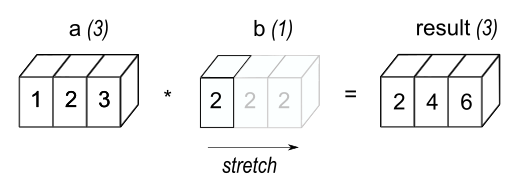
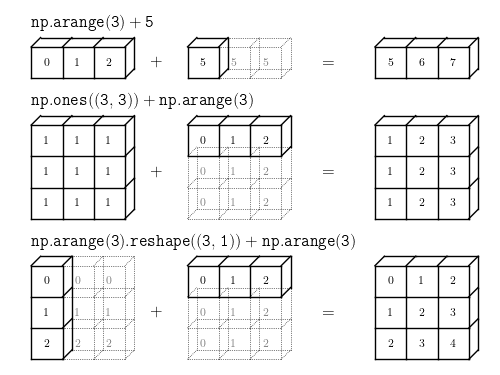

In [75]:
np.array([1, 2, 3]) == np.array([2])

array([False,  True, False])

or it can return False if broadcasting can not be done:
- 안되는 경우? When the trailing dimensions of the arrays are unequal, broadcasting fails because it is impossible to align the values in the rows of the 1st array with the elements of the 2nd arrays for element-by-element addition.
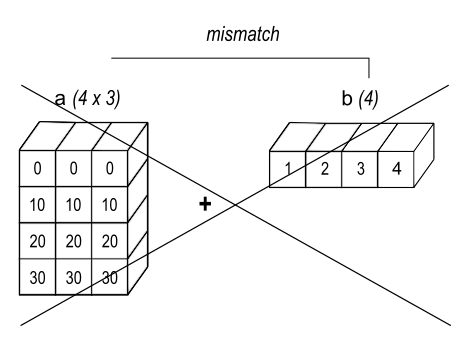

In [76]:
np.array([1, 2, 3]) == np.array([1, 2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

#Combining overlapping data sets
A problem occasionally arising is the combination of two similar data sets where values in one are preferred over the other. An example would be two data series representing a particular economic indicator where one is ocnsidered to be of "higher quality". However, the lower qulaity series might extend further back in history of have more complete data coverage. As such, we would like to combine two DataFrame objects where missing values in one DataFrame are conditionally filled with like-labeled values from the other DataFrame. The function implementing this operation is [combine_first()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.combine_first.html#pandas.DataFrame.combine_first), which we illustrate:

In [77]:
df1 = pd.DataFrame(
    {"A": [1.0, np.nan, 3.0, 5.0, np.nan], "B": [np.nan, 2.0, 3.0, np.nan, 6.0]}
)

df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [78]:
df2 = pd.DataFrame(
    {
        "A": [5.0, 2.0, 4.0, np.nan, 3.0, 7.0],
        "B": [np.nan, np.nan, 3.0, 4.0, 6.0, 8.0],
    }
)

df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,8.0


In [79]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


#General DataFrame combine
The [combine_first()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.combine_first.html#pandas.DataFrame.combine_first) method above calls the more general [DataFrame.combine()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.combine.html#pandas.DataFrame.combine). This method takes another DataFrame and a combiner function, aligns the input DataFrame and then passes the combiner function pairs of Series (i.e., columns whose names are the same). 

So, for instance, to reproduce `combine_first()` as above:

In [80]:
def combiner(x, y):
    return np.where(pd.isna(x), y, x)

In [81]:
df1.combine(df2, combiner)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


#Descriptive statistics
There exists a large number of methods for computing descriptive statistics and other related operations on Series, DataFrame. Most of these are aggregations (hence producing a lower-dimensional result) like [sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html#pandas.DataFrame.sum), [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean), and [quantile()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html#pandas.DataFrame.quantile), but some of them like [cumsum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html#pandas.DataFrame.cumsum) = 누적합 and [cumprod()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumprod.html#pandas.DataFrame.cumprod) = 누적곱, produce an object of the same size. Generally speaking, these methods take an **axis** argument, just lkie ndarray. The axis can be specified by name of integer:
- **Series**: no axis argument needed
- **DataFrame**: "index" (axis=0, default), "columns" (axis=1)

For example:

In [82]:
df

,one,two,three
a,-1.083506,-0.897464,NaN
b,0.774977,-0.571264,0.451010
c,1.467007,-0.521337,1.284676
d,NaN,0.060291,1.782175


In [83]:
df.mean(0)

one      0.386160
two     -0.482443
three    1.172621
dtype: float64

In [84]:
df.mean(1)

a   -0.990485
b    0.218241
c    0.743449
d    0.921233
dtype: float64

All such methods have a `skipna` option signaling whether to exclued missing data (`True` by default):

In [85]:
df.sum(0, skipna=False)

one           NaN
two     -1.929774
three         NaN
dtype: float64

In [86]:
df.sum(axis=1, skipna=True)

a   -1.980969
b    0.654724
c    2.230346
d    1.842466
dtype: float64

Combined with the broadcasting / arithmetic`=산술, 연산` behavior, one can describe various statistical procedures, like standardization (rendering`(provide of give, converting image into other format, making into 3D)` data zero mean and standard deviation of 1), very concisely(=bried but comprehensive):

In [87]:
ts_stand = (df - df.mean()) / df.std()

In [88]:
ts_stand.std()

one      1.0
two      1.0
three    1.0
dtype: float64

In [89]:
xs_stand = df.sub(df.mean(), axis=0).div(df.std(1), axis=0)
xs_stand.std(1)

a       NaN
b       NaN
c       NaN
d       NaN
one     NaN
three   NaN
two     NaN
dtype: float64

Note that methods like cumsum() and cumprod() preserve the location of `NaN` values. This is somewhat different from [expanding()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html#pandas.DataFrame.expanding) and [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html#pandas.DataFrame.rolling) `=이동평균` since `NaN` behavior is furthermore dictated by a `min_periods` parameter.

In [90]:
df.cumsum()

,one,two,three
a,-1.083506,-0.897464,NaN
b,-0.308528,-1.468728,0.451010
c,1.158479,-1.990065,1.735687
d,NaN,-1.929774,3.517862


Note that by chance some NumPy methods, liek `mean, `std`, and `sum`, will exclued NAs on Series input by default:

In [91]:
df["one"]

a   -1.083506
b    0.774977
c    1.467007
d         NaN
Name: one, dtype: float64

In [92]:
np.mean(df["one"])

0.38615950840670665

In [93]:
np.mean(df["one"].to_numpy())

nan

[Series.nunique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html#pandas.Series.nunique) will return the number of unique non-NA values in a Series:

In [94]:
series = pd.Series(np.random.randn(500))
series

0      0.833873
1      0.310404
2      0.426668
3     -0.284541
4     -1.017857
         ...   
495    0.658831
496    0.980051
497   -0.084607
498   -1.992530
499   -0.649317
Length: 500, dtype: float64

In [95]:
series[20:500] = np.nan
series

0      0.833873
1      0.310404
2      0.426668
3     -0.284541
4     -1.017857
         ...   
495         NaN
496         NaN
497         NaN
498         NaN
499         NaN
Length: 500, dtype: float64

In [96]:
series[10:20] = 5
series[10:20]

10    5.0
11    5.0
12    5.0
13    5.0
14    5.0
15    5.0
16    5.0
17    5.0
18    5.0
19    5.0
dtype: float64

In [97]:
series.nunique()

11

#Summarizing data: describe
There is a convenient [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) function which computes a variety of summary statistics about a Series or the columns of a DataFrame (excluding NAs of course):

In [98]:
series = pd.Series(np.random.randn(1000))
series[::2] = np.nan

In [99]:
series

0           NaN
1      0.381850
2           NaN
3     -0.499331
4           NaN
         ...   
995   -1.184302
996         NaN
997    0.841838
998         NaN
999    0.316661
Length: 1000, dtype: float64

In [100]:
series.describe()

count    500.000000
mean       0.010959
std        1.045800
min       -3.066893
25%       -0.670066
50%        0.005042
75%        0.694745
max        3.689390
dtype: float64

In [101]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])

In [102]:
frame.iloc[::2] = np.nan
frame

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,-0.862853,-0.549769,-1.003352,-0.398013,0.333823
2,NaN,NaN,NaN,NaN,NaN
3,-0.598275,-0.136915,2.020183,1.409301,-0.564396
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
995,-2.229869,-0.535112,-0.402606,-0.974376,-0.157946
996,NaN,NaN,NaN,NaN,NaN
997,0.507716,-0.187025,1.363315,0.058073,-0.733779
998,NaN,NaN,NaN,NaN,NaN


In [103]:
frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.036581,-0.029615,-0.022094,0.035858,-0.041880
std,0.938814,0.916956,1.010176,0.979019,1.014372
min,-2.603588,-2.976185,-3.115052,-2.907024,-4.218111
25%,-0.682292,-0.600518,-0.676071,-0.651055,-0.756167
50%,-0.002468,-0.031290,-0.062725,0.018963,-0.024254
75%,0.619104,0.588281,0.582785,0.725938,0.665851
max,2.549466,3.164980,2.819274,3.512118,3.228636


>## ✨ df.iloc()
Purely integer-location based indexing for selection by position.
>### Allowed Inputs
- An integer, e.g. 5.
- A list or array of integers, e.g. [4, 3, 0].
- A slice object with ints, e.g. 1:7.
- A boolean array.
- A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above). This is useful in method chains, when you don’t have a reference to the calling object, but would like to base your selection on some value.

You can select specific percentiles to include in the output:

In [104]:
series.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

count    500.000000
mean       0.010959
std        1.045800
min       -3.066893
5%        -1.776083
25%       -0.670066
50%        0.005042
75%        0.694745
95%        1.654855
max        3.689390
dtype: float64

By default, the median is always included.

For a non-numerical Series object, [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html#pandas.Series.describe) will give a simple summary of the number of unique values and most frequently occurring values:

In [105]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])
s

0      a
1      a
2      b
3      b
4      a
5      a
6    NaN
7      c
8      d
9      a
dtype: object

In [106]:
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

Note that on a mixed-type DataFrame object, `describe()` will restrict the summary to include only numerical columns or, if none are, only categorical columns:

In [107]:
frame = pd.DataFrame({"a": ["Yes", "Yes", "No", "No"], "b": range(4)})
frame

,a,b
0,Yes,0
1,Yes,1
2,No,2
3,No,3


In [108]:
frame.describe()

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


This behavior can be controlled by providing a list of types as `include/exclude` arguments. The special value `all` can also be used:

In [109]:
frame

,a,b
0,Yes,0
1,Yes,1
2,No,2
3,No,3


In [110]:
frame.describe(include=["object"])

,a
count,4
unique,2
top,Yes
freq,2


In [111]:
frame.describe(include=["number"])

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [112]:
frame.describe(include="all")

,a,b
count,4,4.000000
unique,2,NaN
top,Yes,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


That feature relies on [select_dytpes](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-selectdtypes). Refer to there for details about accepted inputs.

#Index of min/max values 
The [idxmin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html#pandas.DataFrame.idxmin) and [idxmax()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html#pandas.DataFrame.idxmax) functions on Series and DataFrame compute the index labels with the minimum and maximum corresponding values:

In [113]:
s1 = pd.Series(np.random.randn(5))
s1

0    0.997636
1    0.416460
2    2.720205
3    0.759599
4   -0.920238
dtype: float64

In [114]:
s1.idxmin(), s1.idxmax()

(4, 2)

In [115]:
df1 = pd.DataFrame(np.random.randn(5,3), columns=["A", "B", "C"])
df1

,A,B,C
0,0.377378,-0.169926,-1.648795
1,-1.886547,0.974652,-1.410906
2,0.850875,-0.038613,0.181975
3,-0.924243,0.079230,1.101499
4,-0.361801,-0.527438,0.301181


In [116]:
df1.idxmin(axis=0)

A    1
B    4
C    0
dtype: int64

In [117]:
df1.idxmax(axis=1)

0    A
1    B
2    A
3    C
4    C
dtype: object

When there are multiple rows (or columns) matching the minimum or maximum value, `idxmin()` and `idxmax()` return the first matching index:

In [118]:
df3 = pd.DataFrame([2,1,1,3,np.nan], columns=["A"], index=list("edcba"))
df3

,A
e,2.0
d,1.0
c,1.0
b,3.0
a,NaN


In [119]:
df3["A"].idxmin()

'd'

In [120]:
df3.idxmin()

A    d
dtype: object

> `idxmin` and `idxmax` are called `argmin` and `argmax` in NumPy.

#Value counts (histogramming) / mode
The [value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts) Series method and top-level function computes a histogram of a 1D array of values. It can also be used as a function on regular arrays: 

In [121]:
data = np.random.randint(0, 7, size=50)
data

array([0, 6, 3, 5, 6, 6, 6, 1, 5, 6, 1, 4, 1, 5, 6, 1, 1, 5, 1, 5, 6, 4,
       1, 5, 6, 2, 2, 4, 5, 5, 4, 3, 5, 2, 5, 4, 5, 1, 2, 5, 6, 5, 3, 6,
       5, 2, 6, 4, 6, 5])

In [122]:
s = pd.Series(data)
s

0     0
1     6
2     3
3     5
4     6
5     6
6     6
7     1
8     5
9     6
10    1
11    4
12    1
13    5
14    6
15    1
16    1
17    5
18    1
19    5
20    6
21    4
22    1
23    5
24    6
25    2
26    2
27    4
28    5
29    5
30    4
31    3
32    5
33    2
34    5
35    4
36    5
37    1
38    2
39    5
40    6
41    5
42    3
43    6
44    5
45    2
46    6
47    4
48    6
49    5
dtype: int64

In [123]:
s.value_counts()

5    15
6    12
1     8
4     6
2     5
3     3
0     1
dtype: int64

In [124]:
pd.value_counts(data)

5    15
6    12
1     8
4     6
2     5
3     3
0     1
dtype: int64

The `value_counts()` method can be used to count combinations across multiple columns. By default all columns are used but a subset can be selected using the `subset` argument. 

In [125]:
data = {"a": [1,2,3,4], "b":["x", "x", "y", "y"]}

In [126]:
frame = pd.DataFrame(data)
frame

,a,b
0,1,x
1,2,x
2,3,y
3,4,y


In [128]:
frame.value_counts()

a  b
1  x    1
2  x    1
3  y    1
4  y    1
dtype: int64

Similary, you can get the most frequently occuring value(s), i.e. the mode, 